In [304]:
#讀取檔案資料
import pandas as pd
cereal = pd.read_csv('cereal.csv')
# cereal.columns = ['name','mfr','type','calories','protein',
#                   'fat','sodium','fiber','carbo','sugars',
#                   'potass','vitamins','shelf','weight','cups','rating']

GetData = cereal[['calories','protein','fat','sodium','fiber','carbo','sugars',
                  'potass','vitamins','shelf','weight','cups','rating']]
#處理特殊值
for i in range(0, len(GetData)):
    if GetData['potass'][i] == -1:
        GetData['potass'][i] = 0
# GetData        

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\IPython\core\interactiveshell.py:2961: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [305]:
#訓練賦值 測試賦值
Train_x = GetData[['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars','potass', 'vitamins', 'shelf', 'weight', 'cups']]
Text_y = GetData[['rating']]

In [306]:
#以 rating 取平均作為預測分類依據
for i in range(0, len(GetData)):
    if float(Text_y['rating'][i]) > float(Text_y.mean()):
        Text_y['rating'][i] = 1
    else:
        Text_y['rating'][i] = 0

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\IPython\core\interactiveshell.py:2961: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [307]:
#建立 Knn模型
import pandas as pd
from sklearn import datasets
from sklearn import neighbors 
from sklearn.model_selection import train_test_split

# iris = datasets.load_iris()
# X = pd.DataFrame(iris.data, columns=iris.feature_names)
# X.columns = ["sepal_length","sepal_width","petal_length","petal_width"]
# target = pd.DataFrame(iris.target, columns=["target"])
# y = target["target"]


XTrain, XTest, yTrain, yTest = train_test_split(Train_x, Text_y, test_size=0.4,random_state=1)
k = 3

knn = neighbors.KNeighborsClassifier(n_neighbors = k)
knn.fit(Train_x, Text_y)
#顯示單筆預測結果
# print(knn.predict(Train_x))
#準確與錯誤率
Knn_accuracy = int(round(knn.score(XTest, yTest)*100))
Knn_errorrate = 100-Knn_accuracy

print("Knn-準確率:", Knn_accuracy)
print("Knn-誤判率:", Knn_errorrate)

# print(knn.predict(XTest))
# print(yTest.values)

Knn-準確率: 97
Knn-誤判率: 3


c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\asus\appdata\local\programs\python

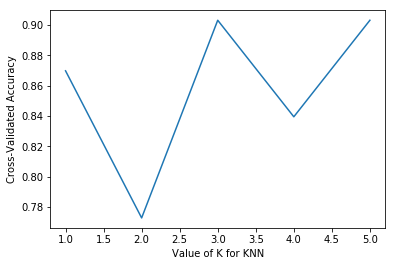

In [308]:
import matplotlib.pyplot as plt #視覺化模板
import pandas as pd
from sklearn import neighbors 
from sklearn.model_selection import cross_val_score 

k_scores = []

#藉由帶入不同的K值來計算對模型的影響，並傳回交叉驗證後的平均分類準確率
for k in range(1, 6):
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn,XTest,yTest,cv = 3,scoring='accuracy')
    k_scores.append(scores.mean())    
    result = scores.mean()
    
#數據視覺化
plt.plot(range(1, 6), k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [309]:
# 建立羅吉斯回歸模型
from sklearn import linear_model

logistic_regr = linear_model.LogisticRegression()
logistic_regr.fit(Train_x, Text_y)

# Check trained model intercept
# print(logistic_regr.intercept_)

# Check trained model coefficients
# print(logistic_regr.coef_)

# 計算準確率
# predictions = logistic_regr.predict(Train_x) 顯示個別預測結果
# print(logistic_regr.predict(Train_x))
#準確與錯誤率
Logi_accuracy = int(round(logistic_regr.score(Train_x, Text_y)*100))
Logi_errorrate = 100-Logi_accuracy 
print("羅吉斯回歸準確度:",Logi_accuracy)
print("羅吉斯回歸誤判率:",Logi_errorrate)

羅吉斯回歸準確度: 96
羅吉斯回歸誤判率: 4


c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [310]:
#Decision tree C4.5  ----entropy
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Train_x, Text_y, test_size=0.4, random_state=0)

from sklearn.tree import DecisionTreeClassifier
entropy_tree = DecisionTreeClassifier(criterion = 'entropy', max_depth=3, random_state=0)
entropy_tree.fit(X_train,y_train)

print("預測結果\n",entropy_tree.predict(Train_x))
print("entropy準確度:",entropy_tree.score(Train_x,Text_y))
print("----------------------------------------------")
#紀錄預測正確
entropy_correct = []  
#紀錄預測錯誤
entropy_error = []
correct = 0
error = 0
for i in range( 0 , len(Train_x) ):
    #假如預測值與實際相符
    if (entropy_tree.predict(Train_x[ i : i+1])==Text_y[ 'rating' ][ i ]):
        entropy_correct.append(i)
        #在錯誤陣列中加入T
        entropy_error.append("T")
        correct+=1
    #反之
    else:
        #在正確陣列中加入F
        entropy_correct.append("F")
        entropy_error.append(i)
        error+=1
        
print("預測正確編號:",entropy_correct," \n個數:",correct)
print("----------------------------------------------")
print("預測錯誤編號:",entropy_error," \n個數:",error)

預測結果
 [1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 0.]
entropy準確度: 0.8961038961038961
----------------------------------------------
預測正確編號: [0, 1, 2, 3, 4, 5, 'F', 7, 8, 9, 10, 11, 12, 13, 'F', 15, 16, 17, 'F', 19, 20, 21, 22, 23, 24, 25, 26, 'F', 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 'F', 40, 41, 42, 43, 44, 45, 46, 47, 'F', 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 'F', 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 'F']  
個數: 69
----------------------------------------------
預測錯誤編號: ['T', 'T', 'T', 'T', 'T', 'T', 6, 'T', 'T', 'T', 'T', 'T', 'T', 'T', 14, 'T', 'T', 'T', 18, 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 27, 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 39, 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 48, 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 59, 'T', 'T

In [311]:
#Decision tree CART  ----gini
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Train_x, Text_y, test_size=0.4, random_state=0)

from sklearn.tree import DecisionTreeClassifier
gini_tree = DecisionTreeClassifier(criterion = 'gini', max_depth=3, random_state=0)
gini_tree.fit(X_train,y_train)

print("預測結果\n",gini_tree.predict(Train_x))
print("gini準確度:",gini_tree.score(Train_x,Text_y))
print("----------------------------------------------")
#紀錄預測正確
gini_correct = []  
#紀錄預測錯誤
gini_error = []
correct = 0
error = 0
for i in range( 0 , len(Train_x) ):
    if (gini_tree.predict(Train_x[ i : i+1]) == Text_y[ 'rating' ][ i ]):
        gini_correct.append(i)
        #在錯誤陣列中加入T
        gini_error.append("T")
        correct+=1
    else:
        #在正確陣列中加入F
        gini_correct.append("F")
        gini_error.append(i)
        error+=1
        
print("預測正確編號:",gini_correct," \n個數:",correct)
print("----------------------------------------------")
print("預測錯誤編號:",gini_error," \n個數:",error)


預測結果
 [1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1.]
gini準確度: 0.948051948051948
----------------------------------------------
預測正確編號: [0, 1, 2, 3, 'F', 'F', 'F', 'F', 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76]  
個數: 73
----------------------------------------------
預測錯誤編號: ['T', 'T', 'T', 'T', 4, 5, 6, 7, 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T

In [312]:
#檢測是否為數字
def is_num(get_something):
    try:
        int(get_something)
        return True
    except ValueError:
        pass
#entrophy classifier1 ; gini classifier2
#計算 分類器1分類器2都正確的情況
count_BCorr = 0
for i in range(0,len(entropy_correct)):
    if( entropy_correct[i] == gini_correct[i] and entropy_correct[i] != 'F'):
            count_BCorr+=1
#            print("都正確的編號:",i)

#計算 分類器1分類器2都錯誤的情況
count_BError = 0
for a in range( 0,len(gini_error) ):
    for b in range( 0,len(entropy_correct) ):
        if( entropy_error[a] == gini_error[b] and entropy_error[a] != 'T'):
            count_BError+=1
#           print("都錯誤的編號:",a)

#計算 分類器1對 ; 分類器2錯情況
count_C1Corr = 0
for i in range(0,len(entropy_correct)):
    if( is_num(entropy_correct[i]) and gini_correct[i] == 'F'):
            count_C1Corr +=1
#           print("只有分類器1對的情況:",i)

#計算 分類器1錯 ; 分類器2對情況
count_C2Corr = 0
for i in range(0,len(entropy_correct)):
    if( is_num(gini_correct[i]) and entropy_correct[i] == 'F'):
            count_C2Corr +=1
#           print("只有分類器2對的情況:",i)

In [313]:
# McNemar檢驗
# 							Classifier2 Correct,	Classifier2 Incorrect
# Classifier1 Correct 			Yes/Yes					Yes/No
# Classifier1 Incorrect 		No/Yes 					No/No

In [314]:
import numpy as np
import scipy.stats as stats
import pandas as pd
from statsmodels.sandbox.stats.runs import cochrans_q, mcnemar

obs = np.array([
                [ count_BCorr  ,  count_C1Corr ],
                [ count_C2Corr ,  count_BError ]
                ])
def Mcnemar(obs):
    '''McNemars Test should be run in the "exact" version, even though approximate formulas are
    typically given in the lecture scripts. Just ignore the statistic that is returned, because
    it is different for the two options.
     
    In the following example, a researcher attempts to determine if a drug has an effect on a
    particular disease. Counts of individuals are given in the table, with the diagnosis
    (disease: present or absent) before treatment given in the rows, and the diagnosis
    after treatment in the columns. The test requires the same subjects to be included in
    the before-and-after measurements (matched pairs).
    '''
    (statistic, pVal) = mcnemar(obs)
    print('\nMCNEMAR\'S TEST -----------------------------------------------------')
    print('p = {0:5.3f}'.format(pVal))
    if pVal < 0.05:
        print("There was a significant change") 
    else:
       print("There was no significant change")
    
    print(obs)
 
 
Mcnemar(obs)     


MCNEMAR'S TEST -----------------------------------------------------
p = 0.344
There was no significant change
[[66  3]
 [ 7  1]]


In [315]:
# #將兩個分類器的正確錯誤率列出來
# import numpy as np
# import pandas as pd
# from pandas.core.frame import DataFrame
# from scipy import stats

# voter_gender = np.array(
#                         (["Entropy"]*entropy_correct)+(["Entropy"]*entropy_error)+\
#                         (["Gini"]*gini_correct)+(["Gini"]*gini_error))

# voter_favorite = np.array((["判斷正確"]*entropy_correct)+(["判斷錯誤"]*entropy_error)+\
#                           (["判斷正確"]*gini_correct)+(["判斷錯誤"]*gini_error))                    


# voters = pd.DataFrame({"gender" : voter_gender,"favorite" : voter_favorite})
# voter_tab = pd.crosstab(voters.gender,voters.favorite,margins = True)

# voter_tab.columns = ["判斷正確","判斷錯誤","小計"]
# voter_tab.index = ["Entropy","Gini","小計"]
# observed = voter_tab.iloc[0:3,0:3]
# print(observed)

In [316]:
# Example of calculating the mcnemar test
from statsmodels.stats.contingency_tables import mcnemar
# define contingency table
table = [[ count_BCorr  ,  count_C1Corr ],
         [ count_C2Corr ,  count_BError ]]
# calculate mcnemar test
result = mcnemar(table, exact=True)
# summarize the finding
print('statistic=%.3f, p-value=%.3f' % (result.statistic, result.pvalue))
# interpret the p-value
alpha = 0.05
if result.pvalue > alpha:
	print('Same proportions of errors (fail to reject H0)')
else:
	print('Different proportions of errors (reject H0)')

statistic=3.000, p-value=0.344
Same proportions of errors (fail to reject H0)
